# Fingerprint analysis

## Imports

In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
from pathlib import Path
import pickle
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sys.path.append('../..')
from kinsim_structure.encoding import Fingerprint

_ColormakerRegistry()

## IO paths

In [4]:
PATH_TO_KINSIM = Path('.') / '..' / '..'
PATH_TO_DATA = PATH_TO_KINSIM / 'examples' / 'data'

PATH_TO_RESULTS = PATH_TO_KINSIM / 'examples' / 'results' / 'fingerprints'

## Functions

In [5]:
def get_fingerprints_by_type(fingerprints, fingerprint_type):
    
    physicochemical_columns = {
        'size': 'Size',
        'hbd': 'HBD',
        'hba': 'HBA',
        'charge': 'Charge',
        'aromatic': 'Aromatic',
        'aliphatic': 'Aliphatic',
        'sco': 'SCO',
        'exposure': 'Exposure'
    }
    
    distances_columns = {
        'distance_to_centroid': 'Centroid',
        'distance_to_hinge_region': 'Hinge region',
        'distance_to_dfg_region': 'DFG region',
        'distance_to_front_pocket': 'Front pocket'
    }
    
    moments_columns = {
        'index': 'Distance to',
        'moment1': 'Moment 1',
        'moment2': 'Moment 2',
        'moment3': 'Moment 3'
    }
    
    features = pd.concat(
            [getattr(i, fingerprint_type) for i in fingerprints], 
            axis=0
        )
    
    if 'physicochemical' in fingerprint_type:
        
        features.rename(
            columns=physicochemical_columns,
            inplace=True
        )
    
    elif 'distances' in fingerprint_type:
        
        features.rename(
            columns=distances_columns,
            inplace=True
        )
        
    elif 'moments' in fingerprint_type:
        
        features.rename(
            columns=moments_columns,
            inplace=True
        )
        
        features.reset_index(inplace=True)

        features.rename(
            columns=moments_columns,
            inplace=True
        )

        features['Distance to'] = [distances_columns[i] for i in features['Distance to']]
        
    else:
        print(f'Input did not match. Check again.')
    
    return features

In [6]:
def plot_boxplot(fingerprints, fingerprint_type):
    
    feature = get_fingerprints_by_type(fingerprints, fingerprint_type)

    feature.plot(
        kind='box',
        title=f'Distribution for {fingerprint_type} features ({int(len(feature) / 85)} values)',
        grid=True,
        rot=90
    )

In [7]:
def melt_fingerprints_by_type(fingerprints, features_type, features_type_label):
    
    if ('physicochemical' in features_type) or ('distances' in features_type):
    
        return get_fingerprints_by_type(fingerprints, features_type).melt(
            var_name=features_type_label, 
            value_name='Feature value'
        )
    
    elif 'moments' in features_type:
        
        return get_fingerprints_by_type(fingerprints, features_type).reset_index().melt(
            id_vars=['Distance to', 'index'],
            var_name=features_type_label, 
            value_name='Feature value'
        )
    
    else:
        print(f'Input did not match. Check again.')

In [8]:
def plot_violinplot(fingerprints, features_type, features_type_label, color):
    
    # Melt data
    melted_data = melt_fingerprints_by_type(fingerprints, features_type, features_type_label)
    
    if ('physicochemical' in features_type) or ('distances' in features_type):
    
        plot = sns.violinplot(
            x=features_type_label, 
            y='Feature value', 
            data=melted_data,
            color=color,
            rot=90
        )
        
    elif 'moments' in features_type:
    
        plot = sns.violinplot(
            x=features_type_label, 
            y='Feature value', 
            hue='Distance to',
            data=melted_data,
            color=color,
            rot=90
        )
        
    else:
        print(f'Input did not match. Check again.')
        plot = None
        
    plot.get_figure().savefig(
        PATH_TO_RESULTS / f'feature_distribution_{features_type}.png', 
        dpi=300
    )
    
    return plot

## Load fingerprints

In [9]:
with open(PATH_TO_RESULTS / 'fingerprints.p', 'rb') as f:
    fingerprints = pickle.load(f)

In [10]:
print(f'Number of fingerprints: {len(fingerprints)}')
fingerprints = [i for i in fingerprints if i is not None]
print(f'Number of non-empty fingerprints: {len(fingerprints)}')

Number of fingerprints: 10
Number of non-empty fingerprints: 10


## Fingerprints

### Boxplot

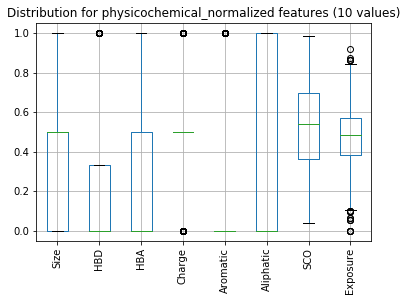

In [11]:
plot_boxplot(fingerprints, 'physicochemical_normalized')

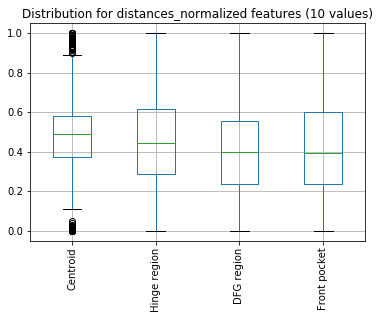

In [12]:
plot_boxplot(fingerprints, 'distances_normalized')

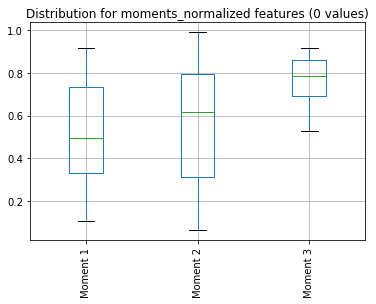

In [13]:
plot_boxplot(fingerprints, 'moments_normalized')

### Violin plot

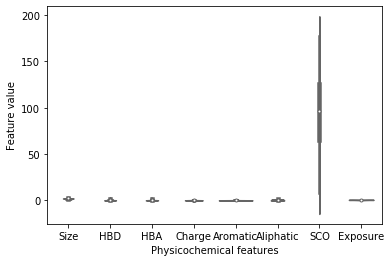

In [14]:
violin_physicochemical = plot_violinplot(
    fingerprints, 
    'physicochemical', 
    'Physicochemical features', 
    'cornflowerblue'
)

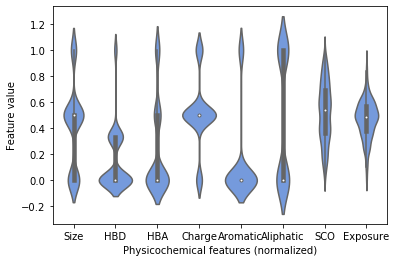

In [15]:
violin_physicochemical = plot_violinplot(
    fingerprints, 
    'physicochemical_normalized', 
    'Physicochemical features (normalized)', 
    'cornflowerblue'
)

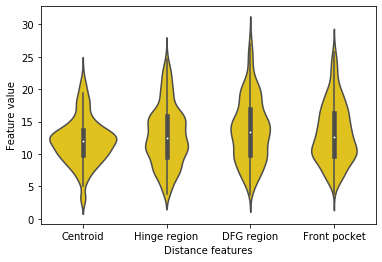

In [20]:
violin_distances = plot_violinplot(
    fingerprints, 
    'distances', 
    'Distance features', 
    'gold'
)

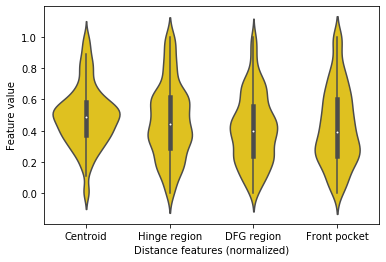

In [21]:
violin_distances = plot_violinplot(
    fingerprints, 
    'distances_normalized', 
    'Distance features (normalized)', 
    'gold'
)

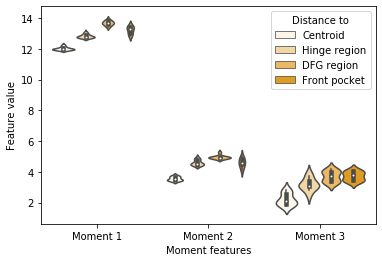

In [18]:
violin_moments = plot_violinplot(
    fingerprints, 
    'moments', 
    'Moment features', 
    'orange'
)

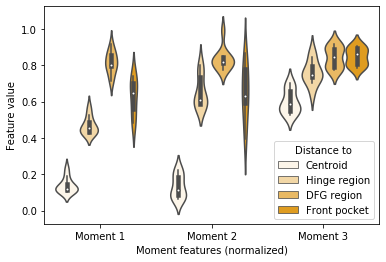

In [19]:
violin_moments = plot_violinplot(
    fingerprints, 
    'moments_normalized', 
    'Moment features (normalized)', 
    'orange'
)